In [1]:
import tensorflow as tf

# Load Fashion-MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Display the dataset shape
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [3]:
x_train = x_train.reshape(-1, 28, 28, 1)  # Reshape for grayscale images
x_test = x_test.reshape(-1, 28, 28, 1)

In [4]:
x_train.shape

(60000, 28, 28, 1)

In [5]:
from tensorflow.keras.utils import to_categorical

# because we are using categorical
# Assuming y_train and y_test are your labels
y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)

In [6]:
y_train_one_hot

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_alexnet(input_shape, num_classes):
    model = models.Sequential()

    # Convolutional Layer 1
    model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Convolutional Layer 2
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Convolutional Layer 3
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))

    # Convolutional Layer 4
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))

    # Convolutional Layer 5
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Flatten the output
    model.add(layers.Flatten())

    # Fully Connected Layer 1
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))

    # Fully Connected Layer 2
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))

    # Fully Connected Layer 3 (Output Layer)
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Example usage
input_shape = (28, 28, 1)  # Input shape of the images (height, width, channels) grayscale image
num_classes = 10  # Number of car types (adjust as necessary)
from tensorflow.keras.optimizers import Adam

model = create_alexnet(input_shape, num_classes)
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss= 'categorical_crossentropy', # using output one hot encoding
    metrics=['accuracy']
)
# Print model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 6, 6, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 6, 6, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,983,370 (7.57 MB)

 Trainable params: 1,983,370 (7.57 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-6,
    verbose=1
)
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

Alex_model = model.fit(
    x=x_train,
    y=y_train_one_hot,
    validation_data=(x_test,y_test_one_hot),
    epochs=100,
    callbacks=[reduce_lr,early_stopping]
)

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.6536 - loss: 1.1764 - val_accuracy: 0.8640 - val_loss: 0.3893 - learning_rate: 1.0000e-04
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8524 - loss: 0.4185 - val_accuracy: 0.8798 - val_loss: 0.3349 - learning_rate: 1.0000e-04
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8799 - loss: 0.3411 - val_accuracy: 0.8813 - val_loss: 0.3293 - learning_rate: 1.0000e-04
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8977 - loss: 0.2853 - val_accuracy: 0.8984 - val_loss: 0.2801 - learning_rate: 1.0000e-04
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9095 - loss: 0.2506 - val_accuracy: 0.9034 - val_loss: 0.2745 - learning_rate: 1.0000e-04
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9194 - loss: 0.2207 - val_accuracy: 0.9051 - val_loss: 0.2642 - learning_rate: 1.0000e-04
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 

In [9]:
# Save the model
model.save('alexnet_car_classifier.h5')

In [10]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('alexnet_car_classifier.h5')

In [14]:
#(60000, 28, 28, 1) # training data shape
from PIL import Image
import numpy as np

def preprocess_image(image_path, target_size):
    # Load the image
    img = Image.open(image_path)
    # Convert the image to grayscale
    print(img.size)
    img = img.convert('L')  # 'L' mode is for grayscale
    print(img.size)
    # Resize the image to match the model's input size
    img = img.resize(target_size)
    print(img.size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    print(img_array.shape)
    # Normalize the image array
    img_array = img_array.astype('float32') / 255.0

    # Expand dimensions to match the model's input shape (batch size, height, width, channels)
    img_array = np.expand_dims(img_array, axis=-1)  # Add channel dimension
    img_array = np.expand_dims(img_array, axis=0)   # Add batch dimension
    print(img_array.shape)

    return img_array

# Example usage
image_path = '/content/Capture.PNG'  # Replace with your image path
target_size = (28, 28)  # Size used during training
img_array = preprocess_image(image_path, target_size)

# Make a prediction
predictions = model.predict(img_array)
print(predictions)

# Get the predicted class index
predicted_class_index = np.argmax(predictions, axis=1)
print(predicted_class_index)


(153, 139)
(153, 139)
(28, 28)
(28, 28)
(1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[0.12585258 0.06175807 0.12572287 0.11573657 0.0868815  0.07320523
  0.12875873 0.09690544 0.10566341 0.07951554]]
[6]


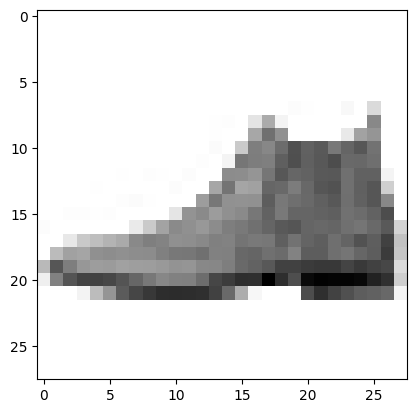


Class 9


In [24]:
import matplotlib.pyplot as plt

plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()
print('\nClass', y_test[0])

In [21]:
print(x_test[0].shape)

(28, 28, 1)


In [20]:
predictions=model.predict(np.expand_dims(x_test[0], 0))
predicted_class_index = np.argmax(predictions, axis=1)

predicted_class_index

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([9])

In [25]:
 # Class mapping (adjust based on your classes)
class_indices = {0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle boot'}

predicted_class = class_indices[predicted_class_index[0]]
print(f'The predicted class is: {predicted_class}')

The predicted class is: Ankle boot
